In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/fraud_database.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

dataset desbalanceado. Como os métodos de machine learning assumem que o dataset é balanceado, será necessário balancear o dataset.

In [7]:
df['x1'] = df.index

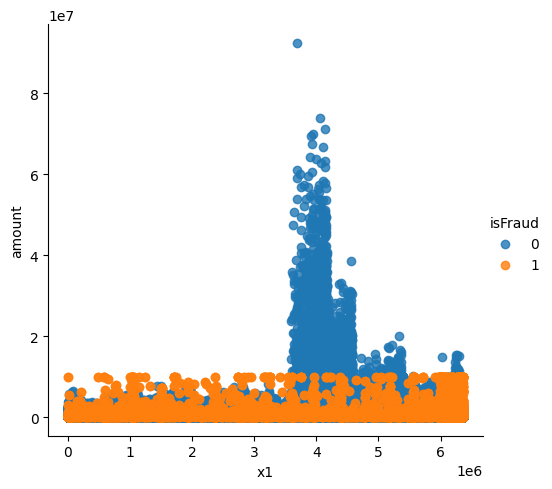

In [8]:
sns.lmplot(x='x1', y='amount', data=df, hue='isFraud', fit_reg=False)

In [9]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
df.shape

(6362620, 12)

In [11]:
df['step'] = df['step'].astype('category')
df['type'] = df['type'].astype('category')
df['nameOrig'] = df['nameOrig'].astype('category')
df['nameDest'] = df['nameDest'].astype('category')
df['isFraud'] = df['isFraud'].astype('category')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            category
 1   type            category
 2   amount          float64 
 3   nameOrig        category
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        category
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         category
 10  isFlaggedFraud  category
 11  x1              int64   
dtypes: category(6), float64(5), int64(1)
memory usage: 632.9 MB


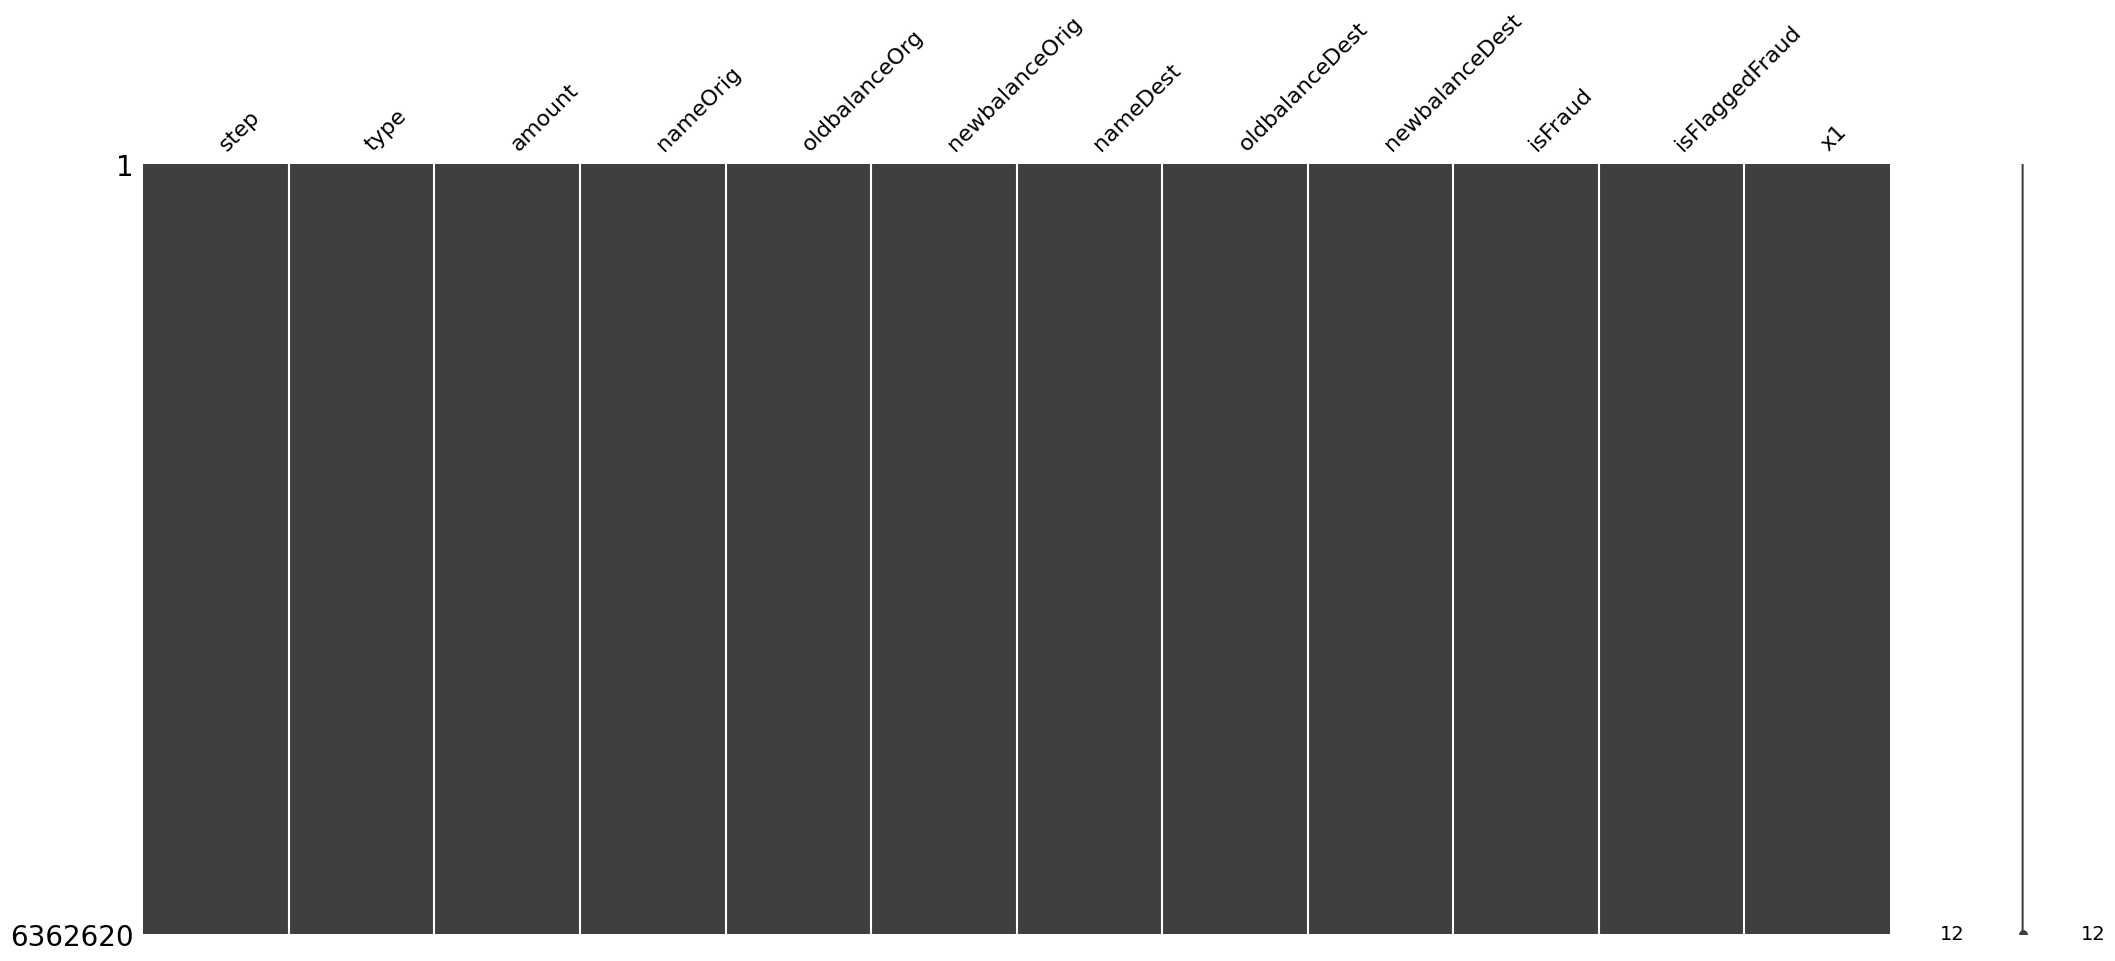

In [13]:
msno.matrix(df)
plt.show()

dataset sem valores faltantes

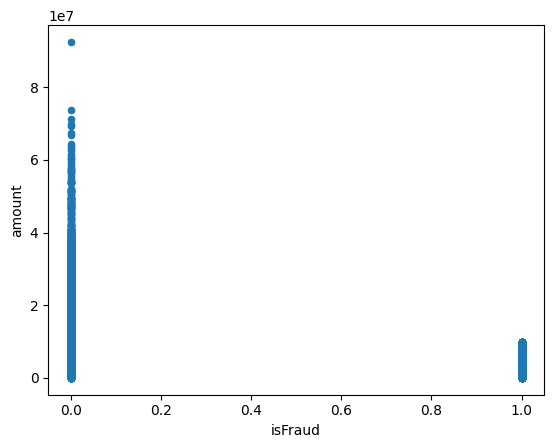

In [14]:
df.plot(
    x='isFraud',
    y='amount',
    kind='scatter'
)
plt.show()

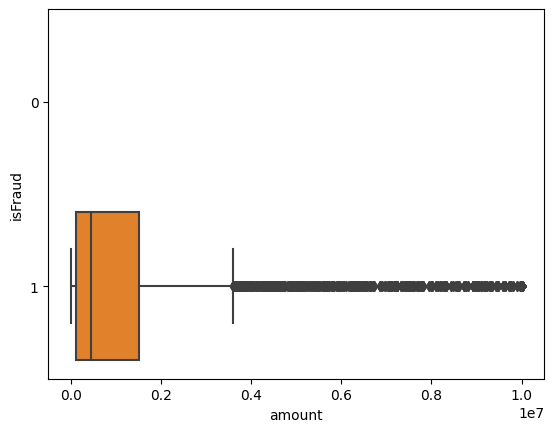

In [15]:
sns.boxplot(
data=df[df['isFraud'] == 1],
x='amount',
y='isFraud',
orient='h'
)
plt.show()

In [16]:
df_isfraud = df[df['isFraud'] == 1]

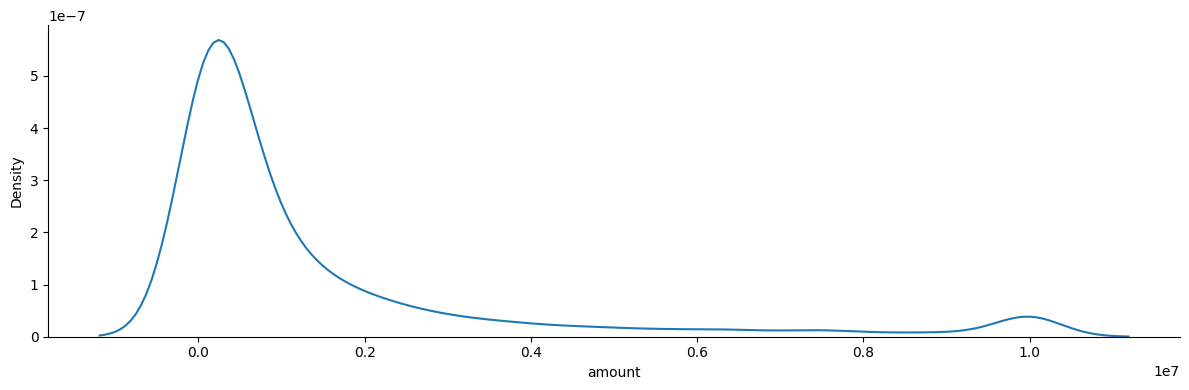

In [17]:
sns.displot(
    df_isfraud['amount'],
    height=4,
    aspect=3,
    kind='kde'
)
plt.show()

In [18]:
df_isfraud.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,x1
count,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03
mean,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,4.244980e+06
std,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,2.157498e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.065130e+06
50%,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,5.188057e+06
75%,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,6.168689e+06
max,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,6.362619e+06


In [19]:
df_isfraud['amount'].median()

441423.44

A mediana dos valores de transações fraudulentas é de 441423.44

In [20]:
df_cat = df.select_dtypes(include='category')
df_num = df.select_dtypes(exclude='category')

In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,x1
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,2
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,3
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,4


In [22]:
df_num.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,x1
0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1864.28,21249.0,19384.72,0.0,0.0,1
2,181.00,181.0,0.00,0.0,0.0,2
3,181.00,181.0,0.00,21182.0,0.0,3
4,11668.14,41554.0,29885.86,0.0,0.0,4


In [23]:
df_cat.head()

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,C1231006815,M1979787155,0,0
1,1,PAYMENT,C1666544295,M2044282225,0,0
2,1,TRANSFER,C1305486145,C553264065,1,0
3,1,CASH_OUT,C840083671,C38997010,1,0
4,1,PAYMENT,C2048537720,M1230701703,0,0


In [24]:
#verificando valores únicos em cada coluna
for x in df_cat.columns:
    print(x, ':', len(df_cat[x].unique()))

step : 743
type : 5
nameOrig : 6353307
nameDest : 2722362
isFraud : 2
isFlaggedFraud : 2


A técnica de One-Hot Enconding será aplicada somente à variável 'type'.

In [25]:
df_encoding = df_cat['type']

In [26]:
df_encoding

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: category
Categories (5, object): ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [27]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [28]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_encoding.values.reshape(-1, 1)))

In [29]:
OH_cols.index = df_encoding.index

In [30]:
OH_cols

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
6362615,0.0,1.0,0.0,0.0,0.0
6362616,0.0,0.0,0.0,0.0,1.0
6362617,0.0,1.0,0.0,0.0,0.0
6362618,0.0,0.0,0.0,0.0,1.0


In [31]:
OH_cols.columns = OH_encoder.get_feature_names_out(['type'])

In [32]:
OH_cols

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
6362615,0.0,1.0,0.0,0.0,0.0
6362616,0.0,0.0,0.0,0.0,1.0
6362617,0.0,1.0,0.0,0.0,0.0
6362618,0.0,0.0,0.0,0.0,1.0


In [33]:
df_num.drop(['x1'], axis=1, inplace=True)

In [34]:
OH_df_num = pd.concat([df_num, OH_cols], axis=1)

In [35]:
OH_df_num.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df_model = pd.concat([OH_df_num, df['isFraud']], axis=1)

In [37]:
df_model

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0
1,1864.28,21249.00,19384.72,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0
2,181.00,181.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1
3,181.00,181.00,0.00,21182.00,0.00,0.0,1.0,0.0,0.0,0.0,1
4,11668.14,41554.00,29885.86,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0.0,1.0,0.0,0.0,0.0,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0.0,1.0,0.0,0.0,0.0,1
6362618,850002.52,850002.52,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,1


Técnicas de balanceamento de dataset

Modelo baseline:

In [38]:
X = df_model.drop(columns=['isFraud'])
y = df_model.isFraud

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.33,
                                                    random_state=42)

In [39]:
len(X_train), len(X_test)

(4262955, 2099665)

In [40]:
y_test.value_counts()

isFraud
0    2096999
1       2666
Name: count, dtype: int64

In [71]:
def model_evaluation(y_test, y_pred, model_function, model_name):
    accuracy =  accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    dict = {'Estrategia' : model_name,
                 'accuracy' : accuracy,
                 'precision' : precision,
                 'recall' : recall,
                 'F1 score' : f1score,
                'AUC' : auc
              }    
    
    df = pd.DataFrame(dict, index=[0])

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_function.classes_)
    disp.plot(values_format='d')

    cr = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    print(cr)

    print(df)

    return df
    

In [73]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)

LogisticRegression(max_iter=200)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   2096999
       Fraud       0.33      0.80      0.46      2666

    accuracy                           1.00   2099665
   macro avg       0.66      0.90      0.73   2099665
weighted avg       1.00      1.00      1.00   2099665

  Estrategia  accuracy  precision   recall  F1 score       AUC
0   baseline  0.997641   0.325553  0.80045  0.462857  0.899171


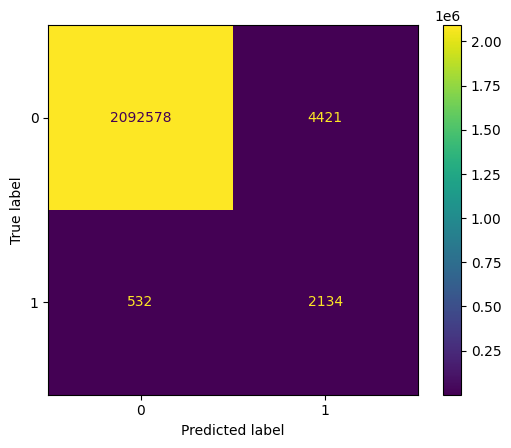

In [72]:
df_baseline = model_evaluation(y_test, y_pred_baseline, logreg_baseline, 'baseline')

Balanced classes:

In [78]:
logreg_balanced = LogisticRegression(class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred_balanced = logreg_balanced.predict(X_test)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.81      0.89   2096999
       Fraud       0.01      0.98      0.01      2666

    accuracy                           0.81   2099665
   macro avg       0.50      0.89      0.45   2099665
weighted avg       1.00      0.81      0.89   2099665

         Estrategia  accuracy  precision    recall  F1 score       AUC
0  balanced classes  0.806749   0.006416  0.982746  0.012749  0.894636


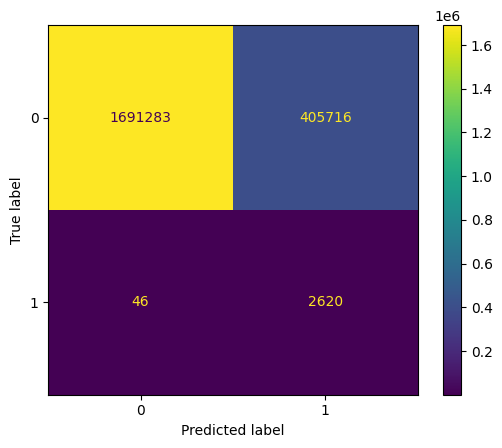

In [83]:
df_balanced = model_evaluation(y_test, y_pred_balanced, logreg_balanced, 'balanced classes')

In [84]:
result = pd.concat([df_baseline, df_balanced])
result

,Estrategia,accuracy,precision,recall,F1 score,AUC
0,baseline,0.997641,0.325553,0.800450,0.462857,0.899171
0,balanced classes,0.806749,0.006416,0.982746,0.012749,0.894636
